In [1]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

No module named 'flow'
No module named 'carla'
pybullet build time: Mar  7 2022 18:18:14


# Load Data

In [2]:
name = "halfcheetah-expert-v2"
env = gym.make(name)
dataset = env.get_dataset()
actions = dataset['actions']

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.19it/s]


# EDA

## 頻度

In [3]:
actions.shape

(1000000, 6)

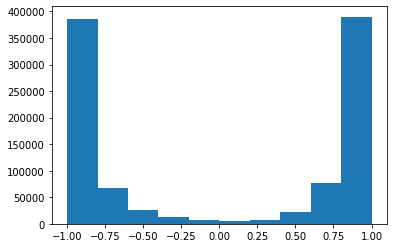

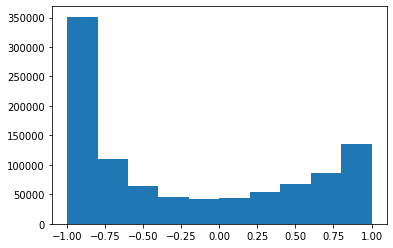

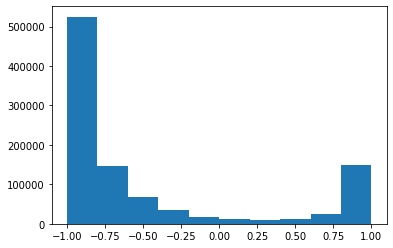

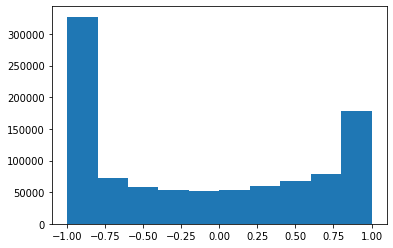

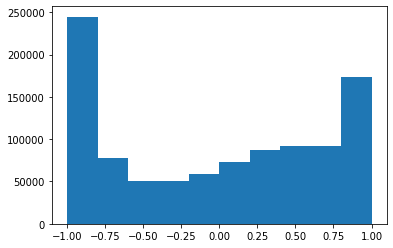

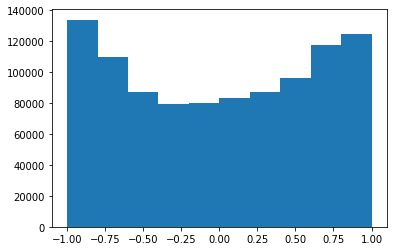

In [4]:
for i in range(actions.shape[1]):
    plt.hist(actions[:, i])
    plt.show()

## round関数の適用

In [5]:
# 小数点以下１桁
actions_1 = np.round(actions, 1)

# 小数点以下２桁
actions_2 = np.round(actions, 2)

In [20]:
np.unique(actions_2)

(201,)

In [21]:
subseq_len = 100
total_len = 10000
action_total_sub = actions_2[:total_len, 0]
count_subsequences = np.zeros((len(actions_2) // subseq_len, len(np.unique(action_total_sub))))
for i in tqdm(range(len(action_total_sub) // subseq_len)):
    actions_sub_seq = action_total_sub[i * subseq_len: (i + 1) * subseq_len]
    for action in actions_sub_seq:
        for j, action_class in enumerate(np.unique(action_total_sub)):
            if action == action_class:
                count_subsequences[i, j] += 1

  0%|          | 0/100 [00:00<?, ?it/s]

In [22]:
count_subsequences.shape

(10000, 198)

In [23]:
mean_list = [count_subsequences[:, i].mean() for i in range(count_subsequences.shape[1])]
std_list = [count_subsequences[:, i].std() for i in range(count_subsequences.shape[1])]

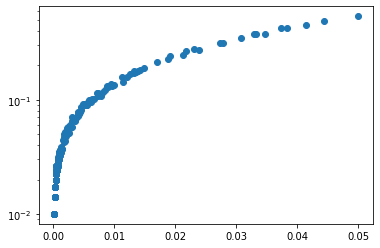

In [24]:
plt.scatter(mean_list, std_list)
plt.yscale('log')
plt.show()